In [7]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
import warnings
warnings.filterwarnings('ignore')

# Dataset Description

The dataset contains information regarding evolution of results in the Portuguese Parliamentary Elections of October 6th 2019. The dataset spans a period of 4 hours and 25 minutes. There are 21 Political parties and 20 territories in the election. It can be used to analyse the performance of political parties over time over different territories. Also a machine learning algorithm can be prepared for predictive tasks.

In [8]:
df = pd.read_csv("ElectionData.csv",parse_dates=["time"])
df.head()

,TimeElapsed,time,territoryName,totalMandates,availableMandates,numParishes,numParishesApproved,blankVotes,blankVotesPercentage,nullVotes,...,pre.votersPercentage,pre.subscribedVoters,pre.totalVoters,Party,Mandates,Percentage,validVotesPercentage,Votes,Hondt,FinalMandates
0,0,2019-10-06 20:10:02,Território Nacional,0,226,3092,1081,9652,2.5,8874,...,52.66,813743,428546,PS,0,38.29,40.22,147993,94,106
1,0,2019-10-06 20:10:02,Território Nacional,0,226,3092,1081,9652,2.5,8874,...,52.66,813743,428546,PPD/PSD,0,33.28,34.95,128624,81,77
2,0,2019-10-06 20:10:02,Território Nacional,0,226,3092,1081,9652,2.5,8874,...,52.66,813743,428546,B.E.,0,6.81,7.15,26307,16,19
3,0,2019-10-06 20:10:02,Território Nacional,0,226,3092,1081,9652,2.5,8874,...,52.66,813743,428546,CDS-PP,0,4.90,5.14,18923,12,5
4,0,2019-10-06 20:10:02,Território Nacional,0,226,3092,1081,9652,2.5,8874,...,52.66,813743,428546,PCP-PEV,0,4.59,4.83,17757,11,12


In [9]:
df.shape

(21643, 28)

In [10]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21643 entries, 0 to 21642
Data columns (total 28 columns):
 #   Column                    Non-Null Count  Dtype         
---  ------                    --------------  -----         
 0   TimeElapsed               21643 non-null  int64         
 1   time                      21643 non-null  datetime64[ns]
 2   territoryName             21643 non-null  object        
 3   totalMandates             21643 non-null  int64         
 4   availableMandates         21643 non-null  int64         
 5   numParishes               21643 non-null  int64         
 6   numParishesApproved       21643 non-null  int64         
 7   blankVotes                21643 non-null  int64         
 8   blankVotesPercentage      21643 non-null  float64       
 9   nullVotes                 21643 non-null  int64         
 10  nullVotesPercentage       21643 non-null  float64       
 11  votersPercentage          21643 non-null  float64       
 12  subscribedVoters  

Let's look at the features individually

Text(0.5, 1.0, 'Number of Observations as per time elapsed')

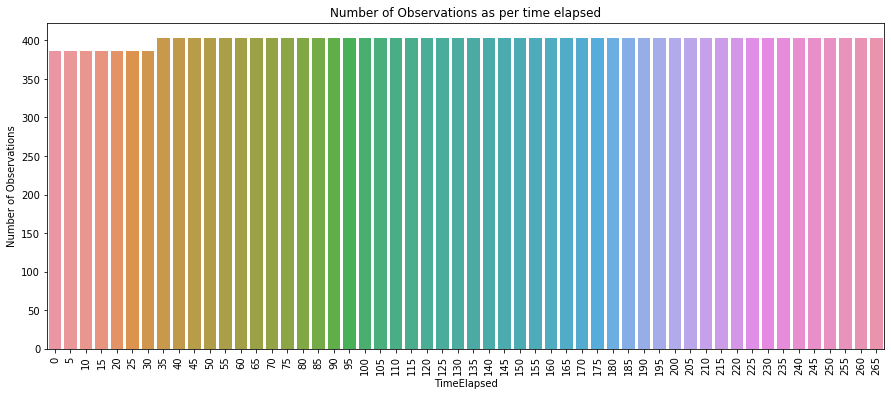

In [13]:
plt.figure(figsize=(15,6))
sns.countplot(df["TimeElapsed"])
plt.xticks(rotation = 90)
plt.ylabel('Number of Observations')
plt.title('Number of Observations as per time elapsed')

The period of the election process took 265 minutes

Let's drop the time column as it does not provide any analytical info and also TimeElapsed column captures the mentioned info

In [14]:
df.drop("time",axis=1,inplace=True)

In [15]:
df["territoryName"].nunique()

21

In [16]:
df["territoryName"].value_counts()

Território Nacional    1134
Porto                  1134
Leiria                 1134
Braga                  1134
Lisboa                 1080
Coimbra                1080
Aveiro                 1080
Setúbal                1080
Madeira                1080
Viana do Castelo       1080
Viseu                  1080
Guarda                 1026
Faro                   1026
Santarém               1026
Évora                  1026
Bragança                972
Castelo Branco          972
Beja                    918
Portalegre              918
Vila Real               864
Açores                  799
Name: territoryName, dtype: int64

The dataset contains election data from 20 different territories, Território Nacional is the summation of all territories.

In [22]:
df["Party"].nunique()

21

In [23]:
df["Party"].value_counts()

PNR          1127
CH           1127
PDR          1127
B.E.         1127
PS           1127
PPD/PSD      1127
CDS-PP       1127
PAN          1127
PCP-PEV      1127
IL           1127
PCTP/MRPP    1127
A            1127
L            1127
PPM          1073
R.I.R.       1026
PTP          1019
MPT          1019
PURP          972
NC            972
JPP           486
MAS           425
Name: Party, dtype: int64

The dataset contains election results of 21 different parties.

In [24]:
territory_mean = df.groupby(['territoryName'],sort = True).mean()
territory_mean

,TimeElapsed,totalMandates,availableMandates,numParishes,numParishesApproved,blankVotes,blankVotesPercentage,nullVotes,nullVotesPercentage,votersPercentage,...,pre.nullVotesPercentage,pre.votersPercentage,pre.subscribedVoters,pre.totalVoters,Mandates,Percentage,validVotesPercentage,Votes,Hondt,FinalMandates
territoryName,,,,,,,,,,,,,,,,,,,,,
Aveiro,132.5,7.944444,8.055556,147.0,107.481481,7021.203704,3.022407,4217.685185,1.787593,54.165741,...,1.674630,55.894074,4.319290e+05,2.427725e+05,0.397222,4.759963,5.000537,11016.150926,0.800000,0.800000
Açores,150.0,3.319149,1.680851,156.0,137.702128,3328.765957,4.855106,1127.829787,1.594043,36.611702,...,1.697872,41.603830,1.899220e+05,7.849285e+04,0.195244,5.502691,5.882578,3838.404255,0.294118,0.294118
Beja,132.5,2.277778,0.722222,75.0,67.425926,1173.296296,2.064815,945.944444,1.721481,52.234815,...,1.529074,57.821296,1.113163e+05,6.431646e+04,0.133987,5.658758,5.881057,3134.818083,0.176471,0.176471
Braga,132.5,11.962963,7.037037,347.0,286.462963,10951.000000,3.076296,6228.555556,1.989074,59.378704,...,1.294259,59.446852,5.999605e+05,3.600675e+05,0.569665,4.520908,4.761728,15982.080247,0.904762,0.904762
Bragança,132.5,1.611111,1.388889,226.0,202.796296,1034.407407,2.027593,1141.462963,2.262963,44.460000,...,2.002963,46.797037,1.189873e+05,5.593626e+04,0.089506,5.317459,5.555967,2693.423868,0.166667,0.166667
Castelo Branco,132.5,2.555556,1.444444,120.0,112.259259,1887.981481,2.392037,1920.574074,2.500185,54.792037,...,2.159815,57.116111,1.535062e+05,8.797772e+04,0.141975,5.283488,5.555617,4164.383745,0.222222,0.222222
Coimbra,132.5,5.074074,3.925926,155.0,128.388889,5061.240741,3.449259,2877.703704,2.078704,52.832963,...,1.763889,55.587222,2.870288e+05,1.605379e+05,0.253704,4.723306,5.000481,6998.113889,0.450000,0.450000
Faro,132.5,5.314815,3.685185,67.0,55.574074,3700.740741,2.939815,2315.444444,1.838333,47.019074,...,1.684815,52.336111,2.772364e+05,1.427115e+05,0.279727,5.012300,5.263285,6482.658869,0.473684,0.473684
Guarda,132.5,2.000000,1.000000,242.0,228.462963,1728.814815,2.617593,1773.314815,2.714259,50.000185,...,2.375556,51.775185,1.416489e+05,7.360611e+04,0.105263,4.981764,5.262641,3268.704678,0.157895,0.157895


In [25]:
territory_max = df.groupby(['territoryName'],sort = True).max()
territory_max

,TimeElapsed,totalMandates,availableMandates,numParishes,numParishesApproved,blankVotes,blankVotesPercentage,nullVotes,nullVotesPercentage,votersPercentage,...,pre.votersPercentage,pre.subscribedVoters,pre.totalVoters,Party,Mandates,Percentage,validVotesPercentage,Votes,Hondt,FinalMandates
territoryName,,,,,,,,,,,,,,,,,,,,,
Aveiro,265,16,16,147,147,10642,3.19,6375,1.90,54.67,...,56.45,653597,368071,R.I.R.,7,37.75,39.53,120839,7,7
Açores,265,5,5,156,156,3926,5.46,1363,1.64,38.51,...,44.27,227546,93803,PTP,3,41.69,44.70,33472,3,3
Beja,265,3,3,75,75,1371,2.13,1094,1.84,53.15,...,58.99,128926,74485,PTP,2,46.06,47.75,26161,2,2
Braga,265,19,19,347,347,14504,3.13,8029,3.35,59.87,...,60.21,787768,474341,R.I.R.,8,38.58,40.61,169468,9,8
Bragança,265,3,3,226,226,1306,2.07,1416,2.33,44.89,...,47.23,147465,69644,R.I.R.,2,42.78,44.66,25909,2,2
Castelo Branco,265,4,4,120,120,2250,2.42,2232,2.95,55.14,...,57.46,181378,104223,R.I.R.,3,43.57,46.01,38302,3,3
Coimbra,265,9,9,155,155,6889,3.62,3814,2.65,53.66,...,56.33,390947,220211,R.I.R.,5,43.75,46.62,79590,5,5
Faro,265,9,9,67,67,4903,3.26,3069,2.03,52.16,...,56.47,370764,190484,R.I.R.,5,42.78,45.17,63480,5,5
Guarda,265,3,3,242,242,2026,2.69,2057,2.81,50.58,...,52.29,163462,85469,R.I.R.,2,38.33,40.53,28783,2,2


Text(0.5, 1.0, 'Total Number of mandates as per region')

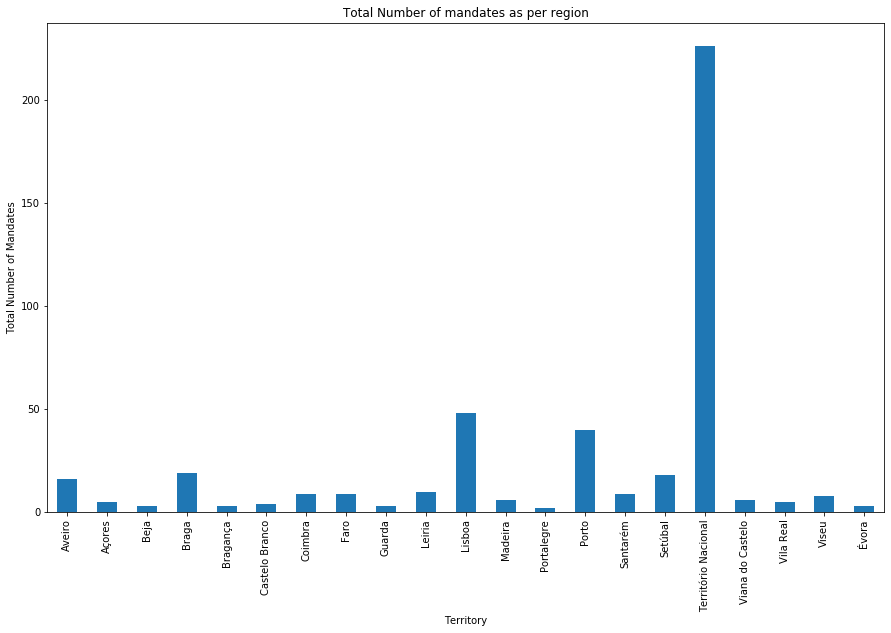

In [26]:
plt.figure(figsize=(15,9))
territory_max["totalMandates"].plot.bar()
plt.ylabel('Total Number of Mandates')
plt.xlabel('Territory')
plt.title('Total Number of mandates as per region')

The maximum number of MP's belong to Lisboa followed by Porto.

Text(0.5, 1.0, 'Total Number of Parishes as per region')

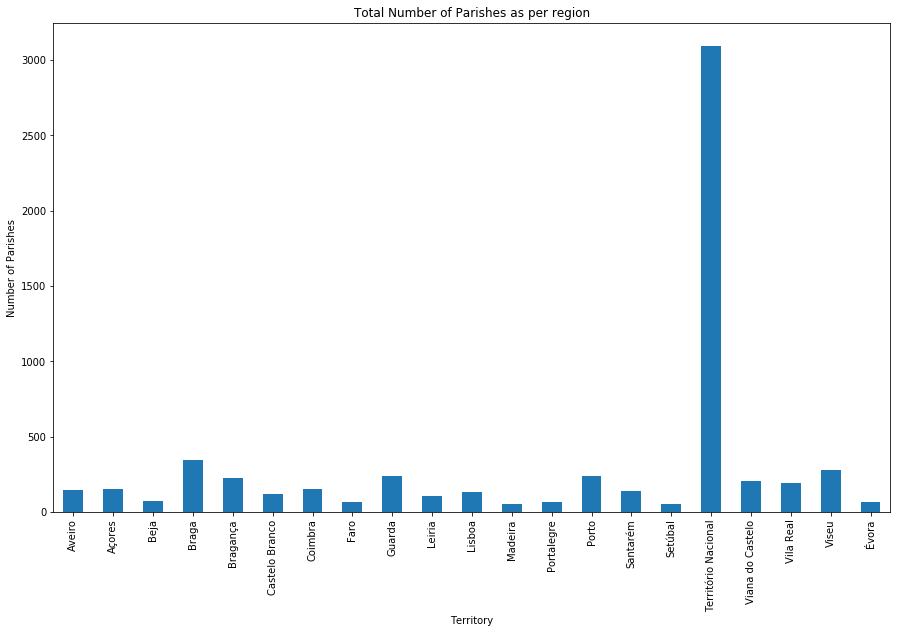

In [27]:
plt.figure(figsize=(15,9))
territory_mean["numParishes"].plot.bar()
plt.ylabel('Number of Parishes')
plt.xlabel('Territory')
plt.title('Total Number of Parishes as per region')

The maximum number of parishes belong to Braga

Text(0.5, 1.0, 'Total Number of Blank Votes as per region')

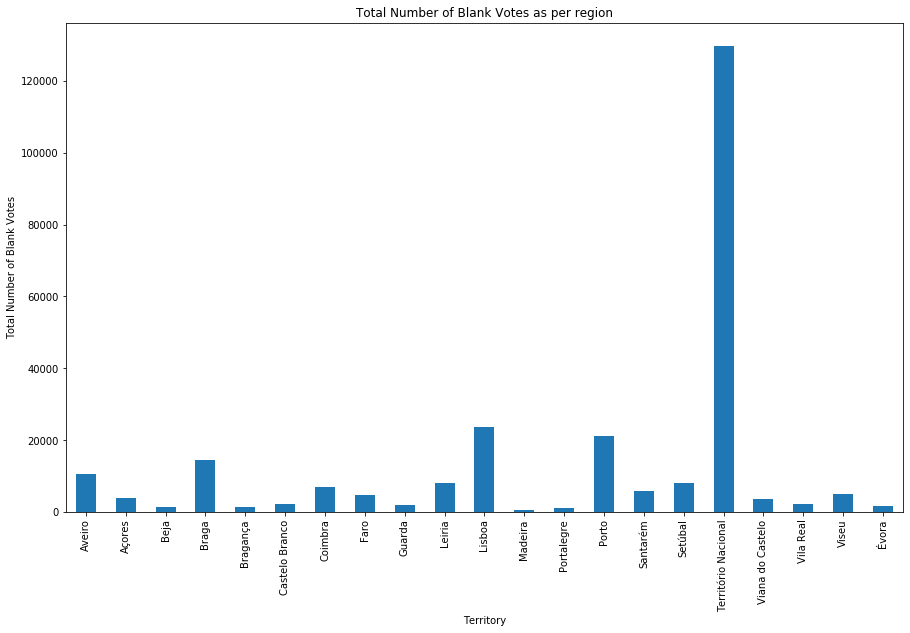

In [28]:
plt.figure(figsize=(15,9))
territory_max["blankVotes"].plot.bar()
plt.ylabel('Total Number of Blank Votes')
plt.xlabel('Territory')
plt.title('Total Number of Blank Votes as per region')

The maximum number of blank votes were given in Lisboa followed by Porto.

Text(0.5, 1.0, 'Average % of Blank Votes over-time as per region')

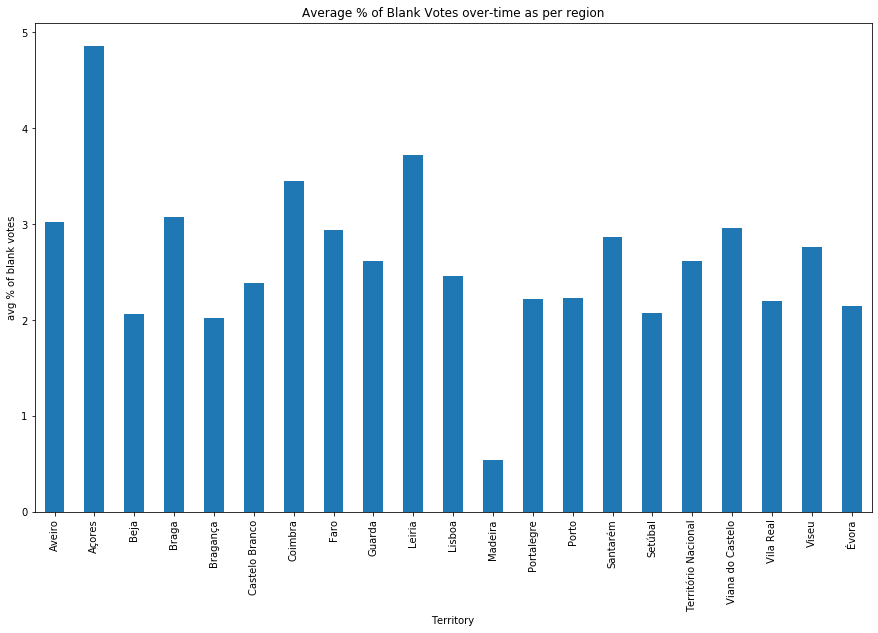

In [31]:
plt.figure(figsize=(15,9))
territory_mean["blankVotesPercentage"].plot.bar()
plt.ylabel('avg % of blank votes')
plt.xlabel('Territory')
plt.title('Average % of Blank Votes over-time as per region')

The highest avg % of blank votes over time were given in Acores followed by Leiria.

Text(0.5, 1.0, 'Total Number of Null Votes as per region')

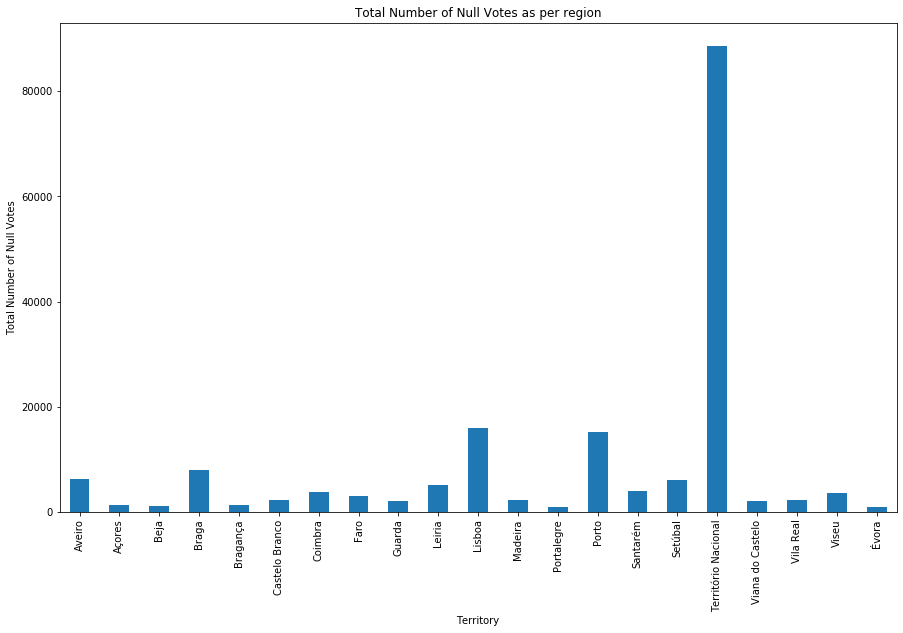

In [32]:
plt.figure(figsize=(15,9))
territory_max["nullVotes"].plot.bar()
plt.ylabel('Total Number of Null Votes')
plt.xlabel('Territory')
plt.title('Total Number of Null Votes as per region')

The maximum number of null votes were given in Lisboa followed by Porto.

Text(0.5, 1.0, 'Average % of Null Votes over-time as per region')

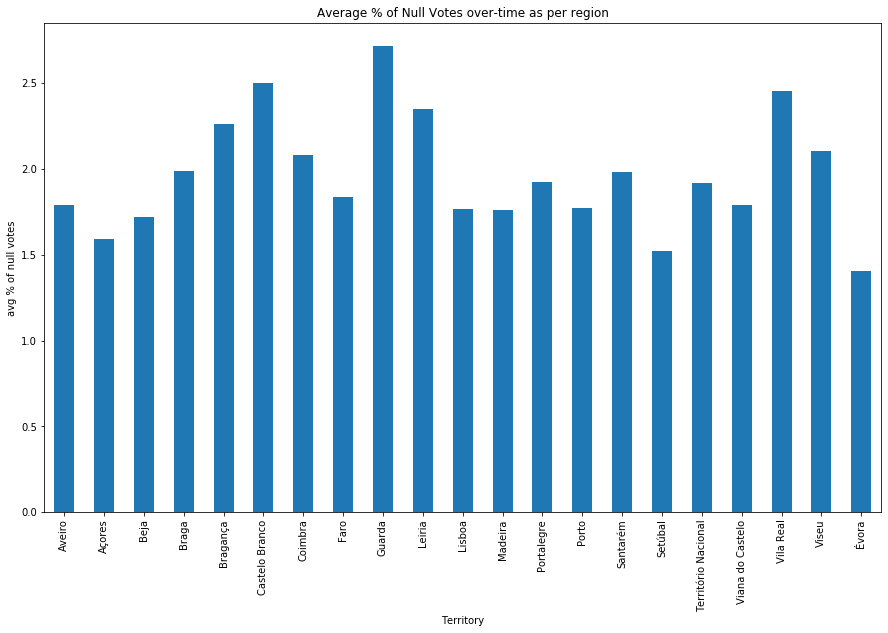

In [33]:
plt.figure(figsize=(15,9))
territory_mean["nullVotesPercentage"].plot.bar()
plt.ylabel('avg % of null votes')
plt.xlabel('Territory')
plt.title('Average % of Null Votes over-time as per region')

The highest avg % of null votes over time were given in Guarda followed by Castelo Branco.

Text(0.5, 1.0, 'Average Voters % over-time as per region')

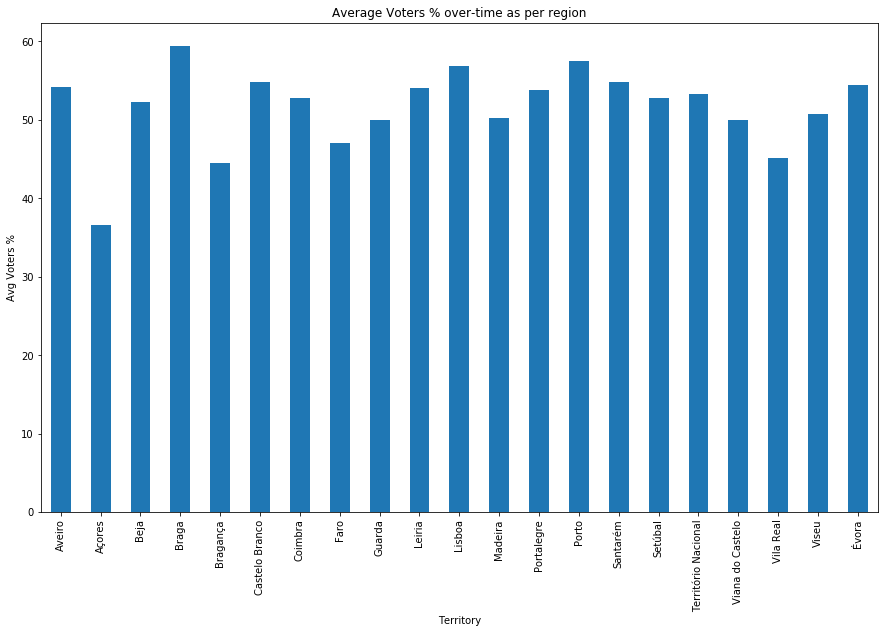

In [34]:
plt.figure(figsize=(15,9))
territory_mean["votersPercentage"].plot.bar()
plt.ylabel('Avg Voters %')
plt.xlabel('Territory')
plt.title('Average Voters % over-time as per region')

Average voters perceentage over time was highest for Braga and least for Acores.

Text(0.5, 1.0, 'Total Number of subscribed Voters as per region')

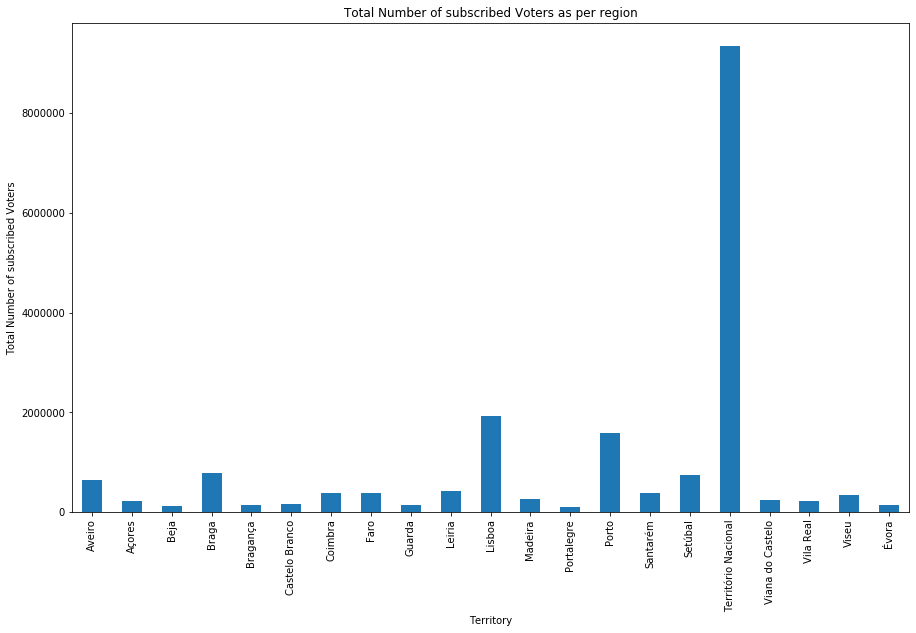

In [35]:
plt.figure(figsize=(15,9))
territory_max["subscribedVoters"].plot.bar()
plt.ylabel('Total Number of subscribed Voters')
plt.xlabel('Territory')
plt.title('Total Number of subscribed Voters as per region')

Total Number of subscribed Voters is highest for Lisboa followed by Porto.

Text(0.5, 1.0, 'Total Voters as per region')

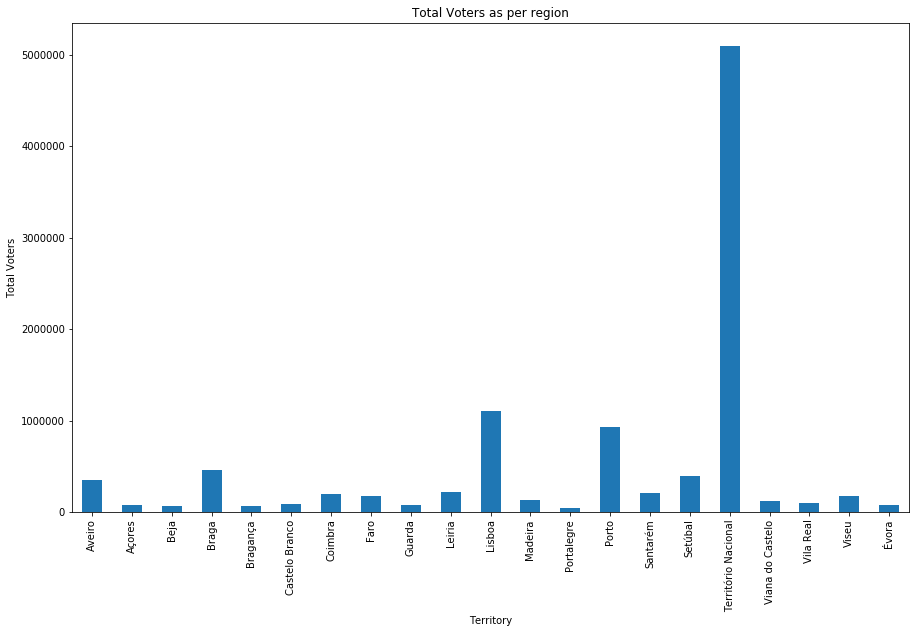

In [36]:
plt.figure(figsize=(15,9))
territory_max["totalVoters"].plot.bar()
plt.ylabel('Total Voters')
plt.xlabel('Territory')
plt.title('Total Voters as per region')

Total Number of Voters is highest for Lisboa followed by Porto.

Text(0.5, 1.0, 'pre-blank Votes as per region')

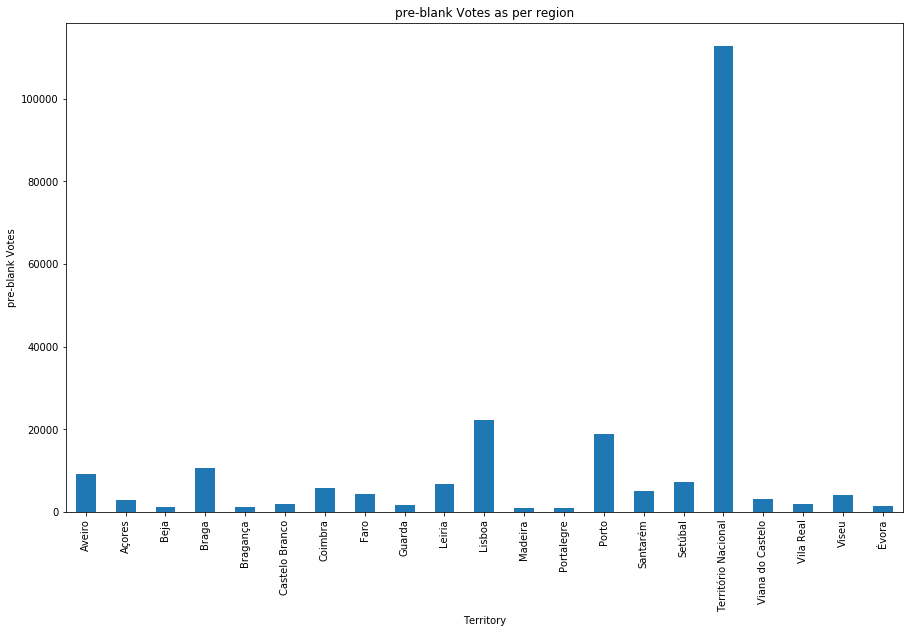

In [37]:
plt.figure(figsize=(15,9))
territory_max["pre.blankVotes"].plot.bar()
plt.ylabel('pre-blank Votes')
plt.xlabel('Territory')
plt.title('pre-blank Votes as per region')

Total Number of pre-blank votes is highest for Lisboa followed by Porto.

Text(0.5, 1.0, 'Avg pre-blank Votes Percentage over-time as per region')

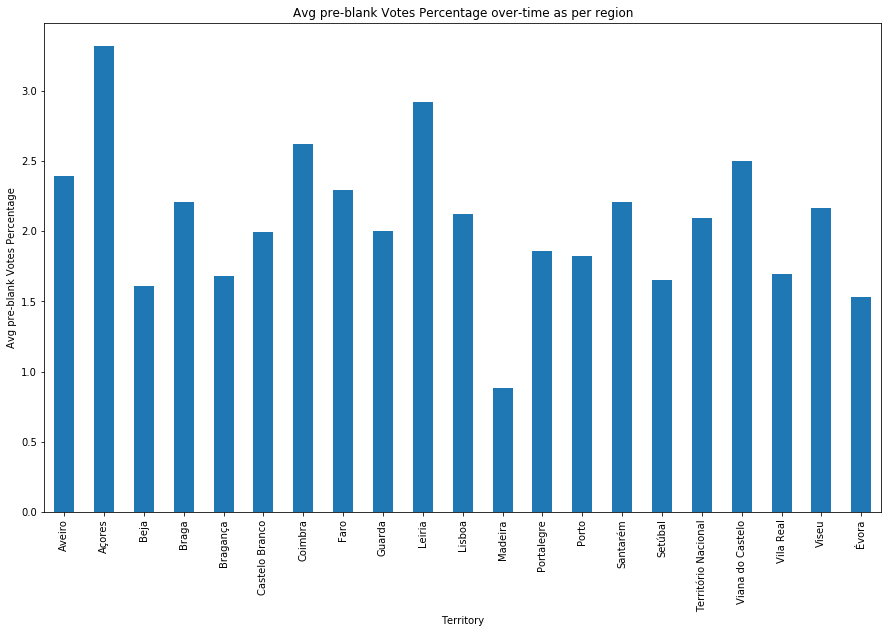

In [38]:
plt.figure(figsize=(15,9))
territory_mean["pre.blankVotesPercentage"].plot.bar()
plt.ylabel('Avg pre-blank Votes Percentage')
plt.xlabel('Territory')
plt.title('Avg pre-blank Votes Percentage over-time as per region')

Avg pre-blank Votes Percentage over-time is highest for Acores and least for Madeira.

Text(0.5, 1.0, 'Total pre-null Votes as per region')

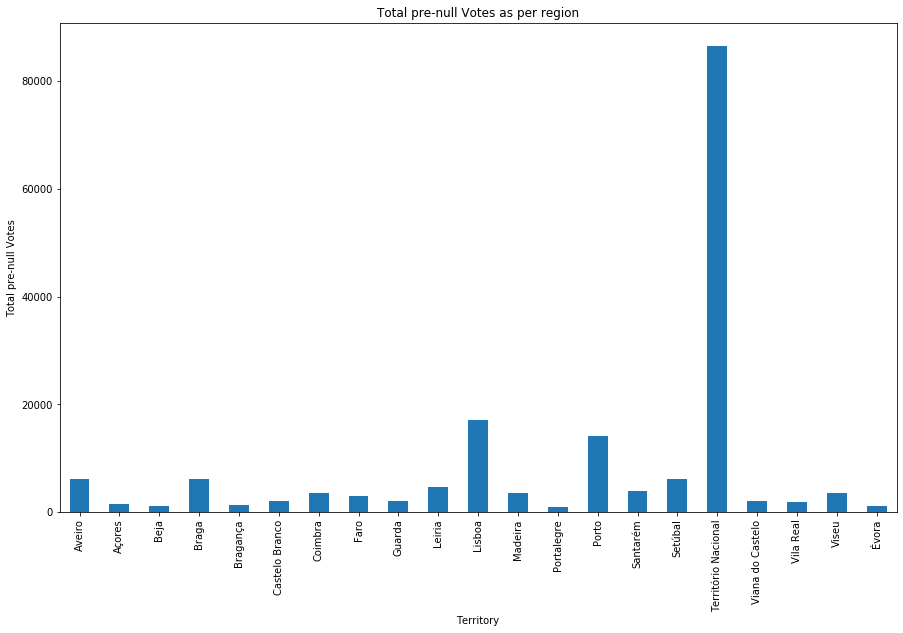

In [39]:
plt.figure(figsize=(15,9))
territory_max["pre.nullVotes"].plot.bar()
plt.ylabel('Total pre-null Votes')
plt.xlabel('Territory')
plt.title('Total pre-null Votes as per region')

Total Number of pre-null votes is highest for Lisboa followed by Porto.

Text(0.5, 1.0, 'Avg pre-null Votes Percentage over-time as per region')

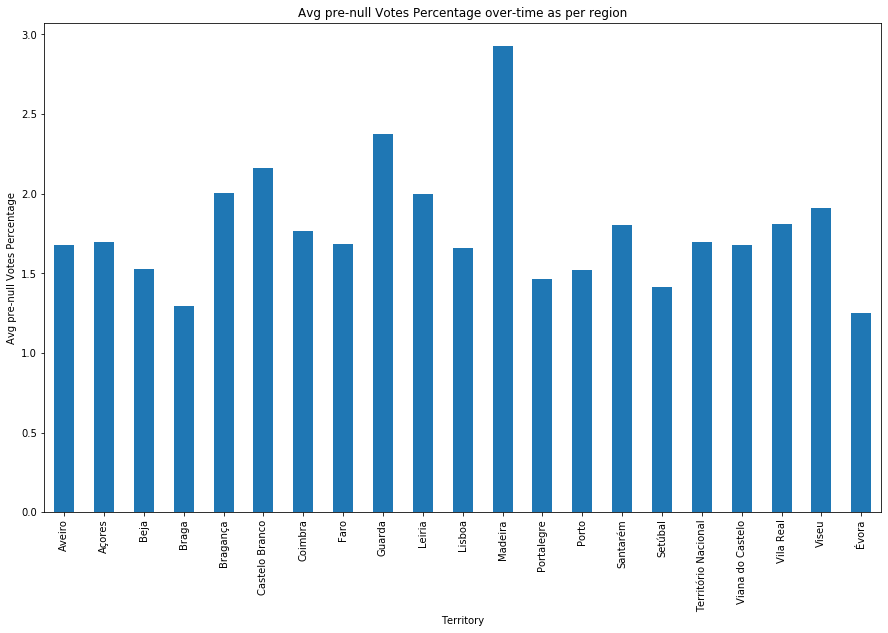

In [40]:
plt.figure(figsize=(15,9))
territory_mean["pre.nullVotesPercentage"].plot.bar()
plt.ylabel('Avg pre-null Votes Percentage')
plt.xlabel('Territory')
plt.title('Avg pre-null Votes Percentage over-time as per region')

Avg pre-null Votes Percentage over-time is highest for Madeira and least for Evora & Braga.

Text(0.5, 1.0, 'Avg pre-voters Percentage over-time as per region')

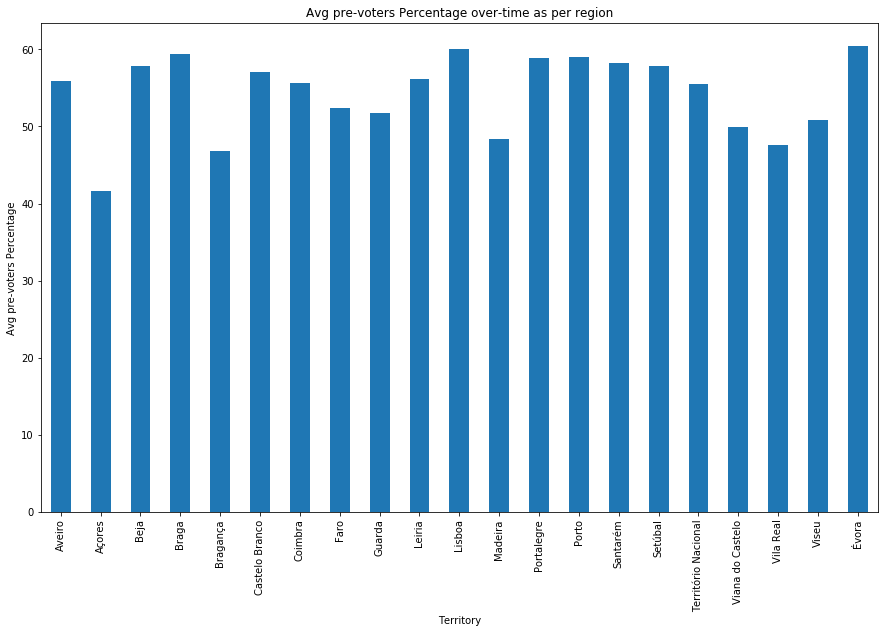

In [41]:
plt.figure(figsize=(15,9))
territory_mean["pre.votersPercentage"].plot.bar()
plt.ylabel('Avg pre-voters Percentage')
plt.xlabel('Territory')
plt.title('Avg pre-voters Percentage over-time as per region')

Avg pre-Voters Percentage over-time is lowest for Acores.

Text(0.5, 1.0, 'Total pre-subscribed Voters as per region')

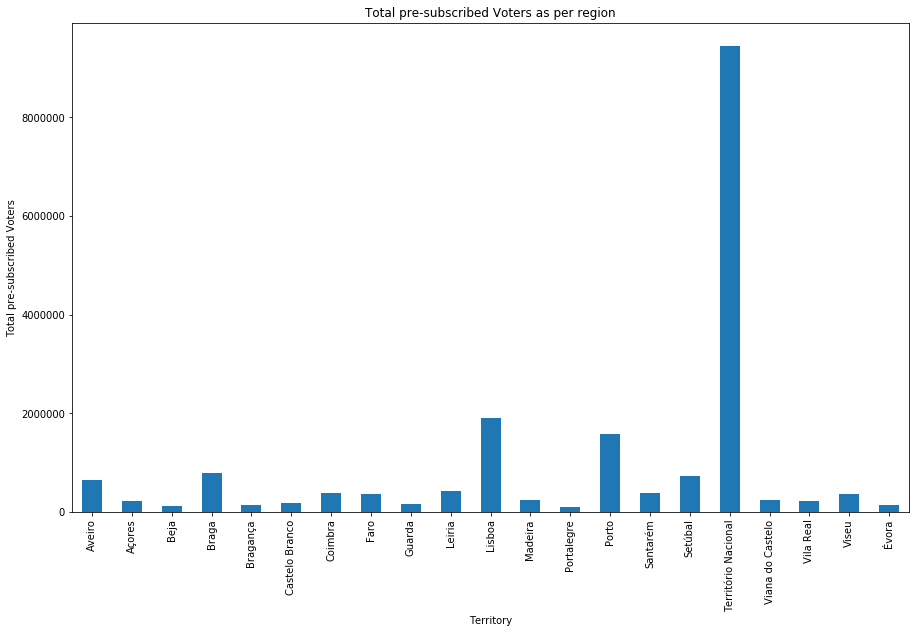

In [42]:
plt.figure(figsize=(15,9))
territory_max["pre.subscribedVoters"].plot.bar()
plt.ylabel('Total pre-subscribed Voters')
plt.xlabel('Territory')
plt.title('Total pre-subscribed Voters as per region')

Total Number of pre-subscribed voters is highest for Lisboa followed by Porto.

Text(0.5, 1.0, 'Total pre-total Voters as per region')

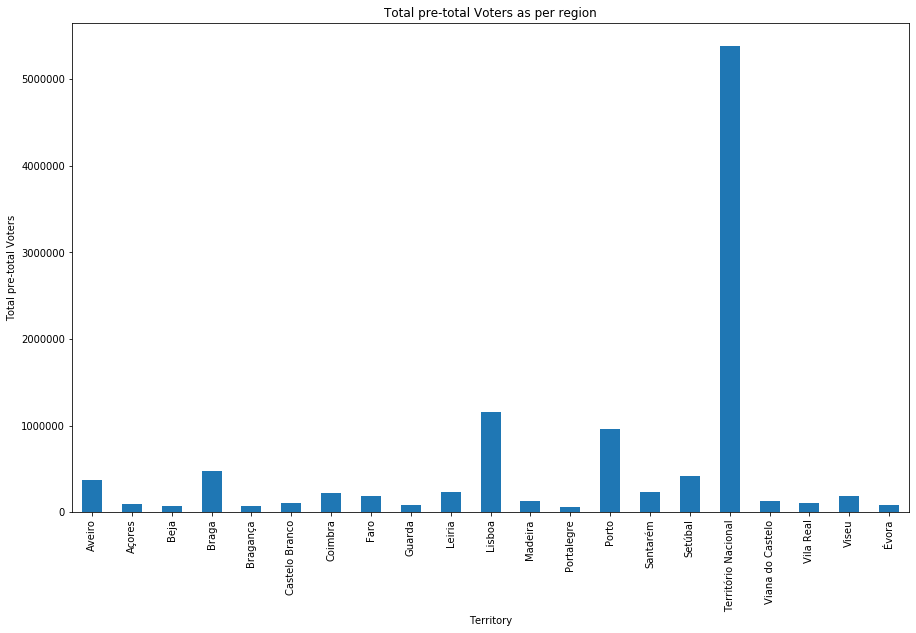

In [43]:
plt.figure(figsize=(15,9))
territory_max["pre.totalVoters"].plot.bar()
plt.ylabel('Total pre-total Voters')
plt.xlabel('Territory')
plt.title('Total pre-total Voters as per region')

Total pre-total voters is highest for Lisboa followed by Porto.

Let us group the results as per party.

In [44]:
party_mean = df.groupby(['Party'],sort = True).mean()
party_mean

,TimeElapsed,totalMandates,availableMandates,numParishes,numParishesApproved,blankVotes,blankVotesPercentage,nullVotes,nullVotesPercentage,votersPercentage,...,pre.nullVotesPercentage,pre.votersPercentage,pre.subscribedVoters,pre.totalVoters,Mandates,Percentage,validVotesPercentage,Votes,Hondt,FinalMandates
Party,,,,,,,,,,,,,,,,,,,,,
A,133.229814,10.859805,10.766637,295.336291,249.193434,8336.545697,2.618181,5784.305235,1.965741,51.771127,...,1.777569,54.413789,6.006279e+05,338010.776398,0.000000,0.638119,0.669246,2289.987578,0.047915,0.000000
B.E.,133.229814,10.859805,10.766637,295.336291,249.193434,8336.545697,2.618181,5784.305235,1.965741,51.771127,...,1.777569,54.413789,6.006279e+05,338010.776398,0.761313,8.528341,8.941145,29748.878438,1.848270,1.820763
CDS-PP,133.229814,10.859805,10.766637,295.336291,249.193434,8336.545697,2.618181,5784.305235,1.965741,51.771127,...,1.777569,54.413789,6.006279e+05,338010.776398,0.181012,4.457551,4.674836,13810.834073,0.748004,0.479148
CH,133.229814,10.859805,10.766637,295.336291,249.193434,8336.545697,2.618181,5784.305235,1.965741,51.771127,...,1.777569,54.413789,6.006279e+05,338010.776398,0.002662,1.300222,1.362236,3992.018634,0.162378,0.095830
IL,133.229814,10.859805,10.766637,295.336291,249.193434,8336.545697,2.618181,5784.305235,1.965741,51.771127,...,1.777569,54.413789,6.006279e+05,338010.776398,0.024845,0.719059,0.753744,3483.149068,0.126886,0.095830
JPP,132.500000,19.590535,18.187243,514.777778,431.639918,15207.207819,2.710329,10431.845679,1.949547,53.575556,...,1.829630,54.526461,1.067264e+06,601945.543210,0.000000,0.677037,0.696811,1685.374486,0.000000,0.000000
L,133.229814,10.859805,10.766637,295.336291,249.193434,8336.545697,2.618181,5784.305235,1.965741,51.771127,...,1.777569,54.413789,6.006279e+05,338010.776398,0.002662,0.718784,0.753709,3041.114463,0.105590,0.095830
MAS,134.435294,22.797647,24.767059,542.767059,448.552941,17907.164706,3.033035,12062.282353,1.877671,53.198447,...,1.629812,55.869200,1.256153e+06,716635.011765,0.000000,0.095600,0.100541,470.301176,0.000000,0.000000
MPT,133.307164,11.750736,11.743867,304.221786,255.526006,9067.589794,2.671384,6230.724239,1.923994,52.509745,...,1.763876,55.176595,6.478667e+05,366031.051030,0.000000,0.233857,0.246349,794.132483,0.000000,0.000000


In [45]:
party_max = df.groupby(['Party'],sort = True).max()
party_max

,TimeElapsed,territoryName,totalMandates,availableMandates,numParishes,numParishesApproved,blankVotes,blankVotesPercentage,nullVotes,nullVotesPercentage,...,pre.nullVotesPercentage,pre.votersPercentage,pre.subscribedVoters,pre.totalVoters,Mandates,Percentage,validVotesPercentage,Votes,Hondt,FinalMandates
Party,,,,,,,,,,,,,,,,,,,,,
A,265,Évora,226,226,3092,3092,129599,5.46,88539,3.35,...,3.12,62.58,9439701,5380451,0,1.27,1.32,39316,1,0
B.E.,265,Évora,226,226,3092,3092,129599,5.46,88539,3.35,...,3.12,62.58,9439701,5380451,19,12.31,12.90,492487,23,19
CDS-PP,265,Évora,226,226,3092,3092,129599,5.46,88539,3.35,...,3.12,62.58,9439701,5380451,5,11.01,11.29,216448,12,5
CH,265,Évora,226,226,3092,3092,129599,5.46,88539,3.35,...,3.12,62.58,9439701,5380451,1,2.76,2.88,66442,3,1
IL,265,Évora,226,226,3092,3092,129599,5.46,88539,3.35,...,3.12,62.58,9439701,5380451,1,2.47,2.56,65545,3,1
JPP,265,Viseu,226,226,3092,3092,129599,3.87,88539,3.35,...,3.12,60.39,9439701,5380451,0,7.49,7.68,9945,0,0
L,265,Évora,226,226,3092,3092,129599,5.46,88539,3.35,...,3.12,62.58,9439701,5380451,1,2.07,2.15,55656,2,1
MAS,265,Território Nacional,226,226,3092,3092,129599,5.46,88539,3.35,...,2.20,61.18,9439701,5380451,0,0.17,0.18,3158,0,0
MPT,265,Évora,226,226,3092,3092,129599,5.46,88539,3.35,...,3.12,62.58,9439701,5380451,0,0.44,0.47,11622,0,0


Text(0.5, 1.0, 'Total Mandates as per Party')

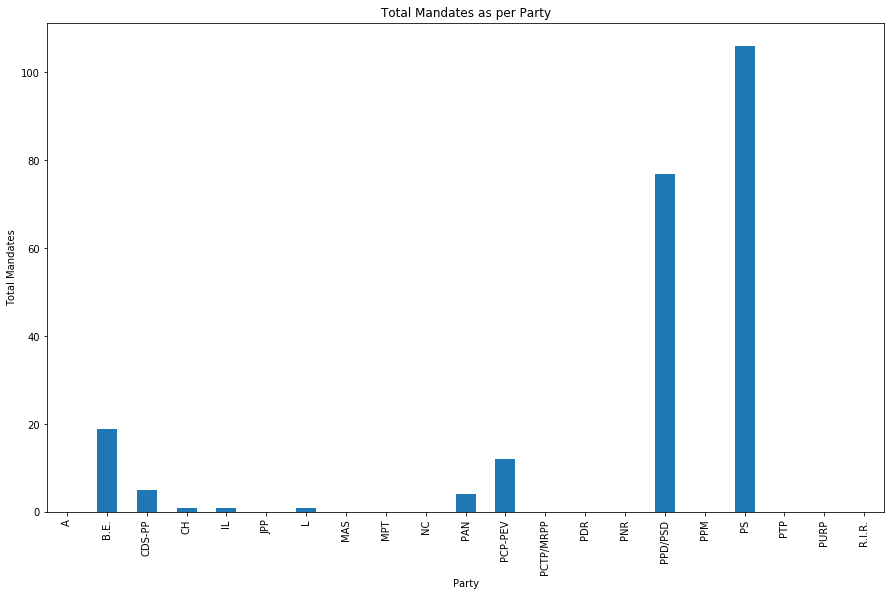

In [47]:
plt.figure(figsize=(15,9))
party_max["Mandates"].plot.bar()
plt.ylabel('Total Mandates')
plt.xlabel('Party')
plt.title('Total Mandates as per Party')

Highest number of mandates were won by the PS party followed by PPD/PSD.

Text(0.5, 1.0, 'Avg. Percentage of votes over time as per Party')

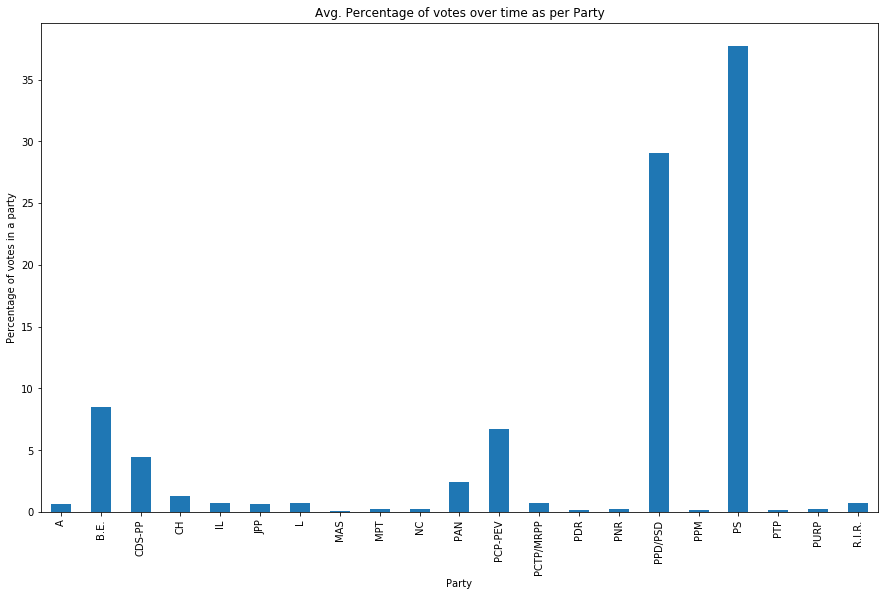

In [49]:
plt.figure(figsize=(15,9))
party_mean["Percentage"].plot.bar()
plt.ylabel('Percentage of votes in a party')
plt.xlabel('Party')
plt.title('Avg. Percentage of votes over time as per Party')

Maximum avg % of votes over time were given to the PS party followed by PPD/PSD.

Text(0.5, 1.0, 'Avg. valid Votes Percentage over time as per Party')

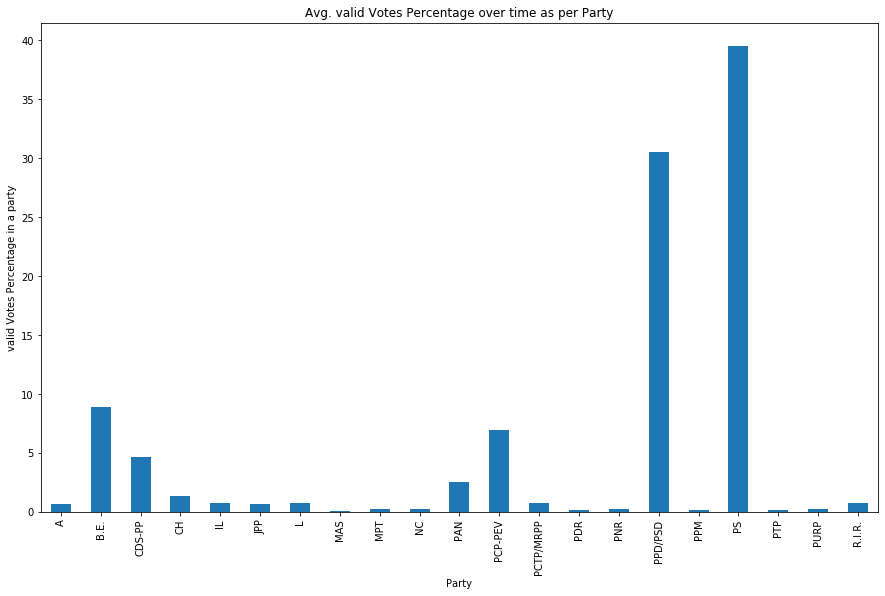

In [51]:
plt.figure(figsize=(15,9))
party_mean["validVotesPercentage"].plot.bar()
plt.ylabel('valid Votes Percentage in a party')
plt.xlabel('Party')
plt.title('Avg. valid Votes Percentage over time as per Party')

Maximum avg % of valid votes over time were given to the PS party followed by PPD/PSD.

Text(0.5, 1.0, 'Total Votes as per Party')

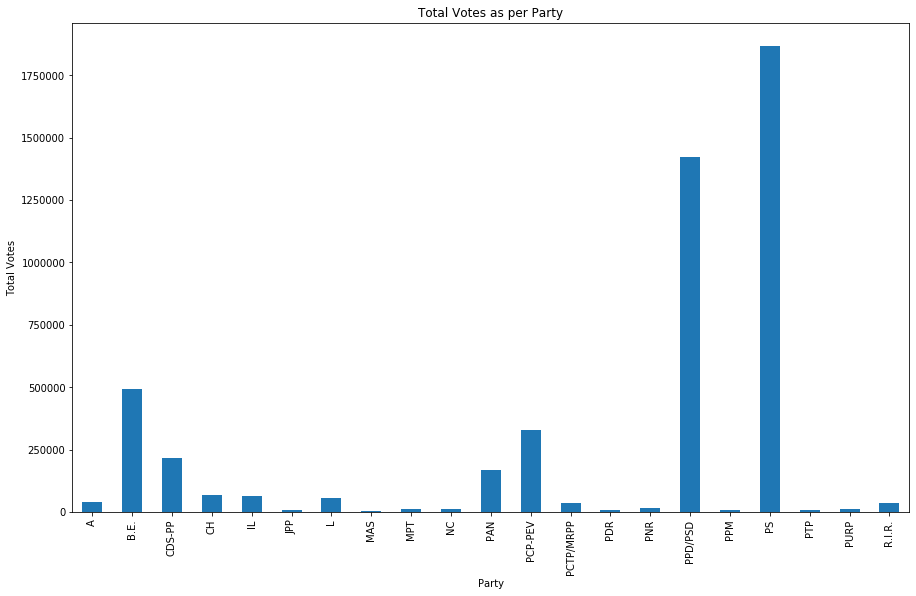

In [88]:
plt.figure(figsize=(15,9))
party_max["Votes"].plot.bar()
plt.ylabel('Total Votes')
plt.xlabel('Party')
plt.title('Total Votes as per Party')

Highest number of total votes were given to the PS party followed by PPD/PSD.

Let us visualize the final mandates as per party over different territories through a heatmap.

In [52]:
final_mandates = df[["territoryName","Party","FinalMandates"]].pivot_table(index="territoryName",columns="Party")
final_mandates

FinalMandates                                             \
Party                           A  B.E. CDS-PP   CH   IL  JPP    L  MAS  MPT   
territoryName                                                                  
Aveiro                        0.0   2.0    1.0  0.0  0.0  0.0  0.0  NaN  0.0   
Açores                        0.0   0.0    0.0  0.0  0.0  NaN  0.0  0.0  0.0   
Beja                          0.0   0.0    0.0  0.0  0.0  NaN  0.0  NaN  0.0   
Braga                         0.0   2.0    1.0  0.0  0.0  0.0  0.0  0.0  0.0   
Bragança                      0.0   0.0    0.0  0.0  0.0  NaN  0.0  NaN  NaN   
Castelo Branco                0.0   0.0    0.0  0.0  0.0  NaN  0.0  NaN  0.0   
Coimbra                       0.0   1.0    0.0  0.0  0.0  0.0  0.0  0.0  0.0   
Faro                          0.0   1.0    0.0  0.0  0.0  NaN  0.0  NaN  0.0   
Guarda                        0.0   0.0    0.0  0.0  0.0  NaN  0.0  NaN  0.0   
Leiria                        0.0   1.0    0.0  0.0  0.0  0.0  0.0  0.0  0.0   
Lisboa                        0.0   5.0    2.0  1.0  1.0  NaN  1.0  0.0  0.0   
Madeira                       0.0   0.0    0.0  0.0  0.0  0.0  0.0  NaN  0.0   
Portalegre                    0.0   0.0    0.0  0.0  0.0  NaN  0.0  NaN  0.0   
Porto                         0.0   4.0    1.0  0.0  0.0  0.0  0.0  0.0  0.0   
Santarém                      0.0   1.0    0.0  0.0  0.0  NaN  0.0  NaN  0.0   
Setúbal                       0.0   2.0    0.0  0.0  0.0  NaN  0.0  0.0  0.0   
Território Nacional           0.0  19.0    5.0  1.0  1.0  0.0  1.0  0.0  0.0   
Viana do Castelo              0.0   0.0    0.0  0.0  0.0  0.0  0.0  NaN  0.0   
Vila Real                     0.0   0.0    0.0  0.0  0.0  NaN  0.0  NaN  NaN   
Viseu                         0.0   0.0    0.0  0.0  0.0  0.0  0.0  NaN  0.0   
Évora                         0.0   0.0    0.0  0.0  0.0  NaN  0.0  NaN  0.0   

                          ...                                                  \
Party                 NC  ... PCP-PEV PCTP/MRPP  PDR  PNR PPD/PSD  PPM     PS   
territoryName             ...                                                   
Aveiro               0.0  ...     0.0       0.0  0.0  0.0     6.0  0.0    7.0   
Açores               NaN  ...     0.0       0.0  0.0  0.0     2.0  0.0    3.0   
Beja                 0.0  ...     1.0       0.0  0.0  0.0     0.0  0.0    2.0   
Braga                0.0  ...     0.0       0.0  0.0  0.0     8.0  0.0    8.0   
Bragança             0.0  ...     0.0       0.0  0.0  0.0     2.0  0.0    1.0   
Castelo Branco       NaN  ...     0.0       0.0  0.0  0.0     1.0  0.0    3.0   
Coimbra              0.0  ...     0.0       0.0  0.0  0.0     3.0  0.0    5.0   
Faro                 0.0  ...     0.0       0.0  0.0  0.0     3.0  0.0    5.0   
Guarda               0.0  ...     0.0       0.0  0.0  0.0     1.0  0.0    2.0   
Leiria               0.0  ...     0.0       0.0  0.0  0.0     5.0  0.0    4.0   
Lisboa               0.0  ...     4.0       0.0  0.0  0.0    12.0  0.0   20.0   
Madeira              0.0  ...     0.0       0.0  0.0  0.0     3.0  0.0    3.0   
Portalegre           NaN  ...     0.0       0.0  0.0  0.0     0.0  NaN    2.0   
Porto                0.0  ...     2.0       0.0  0.0  0.0    15.0  0.0   17.0   
Santarém             0.0  ...     1.0       0.0  0.0  0.0     3.0  0.0    4.0   
Setúbal              0.0  ...     3.0       0.0  0.0  0.0     3.0  0.0    9.0   
Território Nacional  0.0  ...    12.0       0.0  0.0  0.0    77.0  0.0  106.0   
Viana do Castelo     0.0  ...     0.0       0.0  0.0  0.0     3.0  0.0    3.0   
Vila Real            0.0  ...     0.0       0.0  0.0  0.0     3.0  0.0    2.0   
Viseu                0.0  ...     0.0       0.0  0.0  0.0     4.0  0.0    4.0   
Évora                0.0  ...     1.0       0.0  0.0  0.0     0.0  0.0    2.0   

                                      
Party                PTP PURP R.I.R.  
territoryName                         
Aveiro               0.0  0.0    0.0 

Text(0.5, 69.0, 'Party')

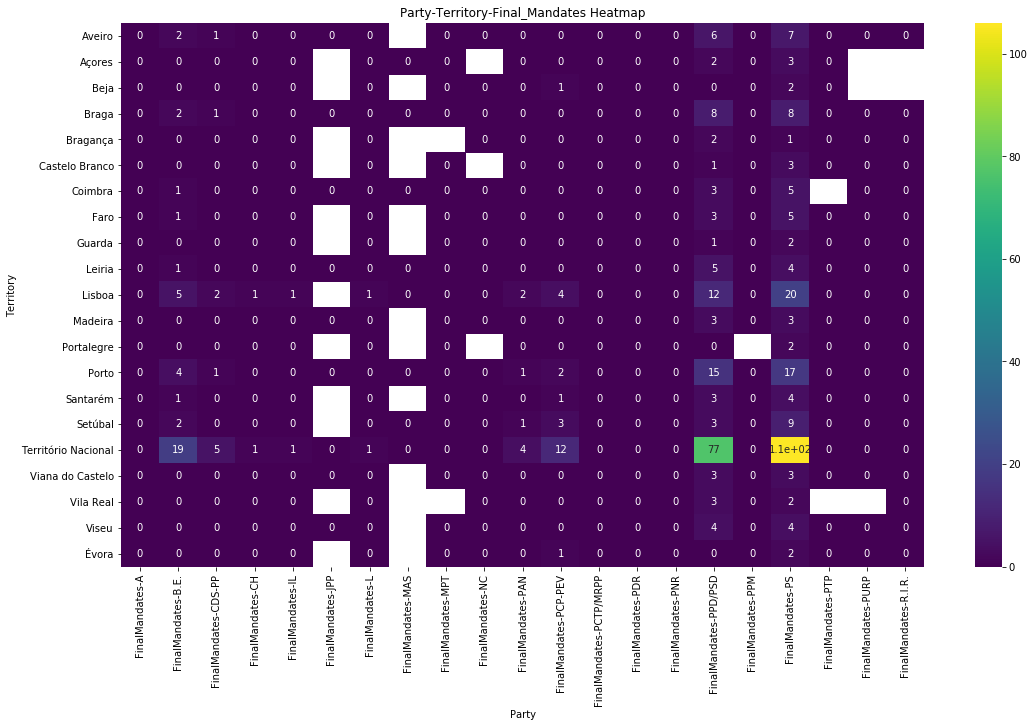

In [53]:
plt.figure(figsize=(18,10))
sns.heatmap(final_mandates,cmap='viridis',annot=True)
plt.title("Party-Territory-Final_Mandates Heatmap")
plt.ylabel('Territory')
plt.xlabel('Party')

PS won the highest number of mandates in Lisboa (20) followed by in Porto (17) territory. Overall PS won highest number of mandates (106) in the country followed by PPD/PSD (77).

Let's look at correlation of all the continuous features in the dataset.

In [54]:
cor = df.corr()
cor

,TimeElapsed,totalMandates,availableMandates,numParishes,numParishesApproved,blankVotes,blankVotesPercentage,nullVotes,nullVotesPercentage,votersPercentage,...,pre.nullVotesPercentage,pre.votersPercentage,pre.subscribedVoters,pre.totalVoters,Mandates,Percentage,validVotesPercentage,Votes,Hondt,FinalMandates
TimeElapsed,1.000000,0.260377,-0.261627,-0.001944,0.100432,0.192350,0.034343,0.185784,-0.225021,0.029698,...,-0.106054,0.054761,0.193160,0.196667,0.090190,0.000767,0.000526,0.082417,-0.001100,-0.001007
totalMandates,0.260377,1.000000,0.217404,0.765877,0.873415,0.969988,-0.003149,0.967294,-0.165132,0.171317,...,-0.132143,0.151927,0.972976,0.975404,0.336989,-0.010171,-0.010474,0.395617,0.288420,0.264117
availableMandates,-0.261627,0.217404,1.000000,0.745472,0.562719,0.390638,-0.002806,0.407366,0.029915,0.112293,...,-0.044174,0.080524,0.391272,0.383089,0.072320,-0.011083,-0.011052,0.152348,0.291310,0.266764
numParishes,-0.001944,0.765877,0.745472,1.000000,0.954092,0.861279,0.032013,0.870240,0.013209,0.073855,...,-0.058017,0.026407,0.860782,0.853779,0.257365,-0.010770,-0.010624,0.343593,0.359283,0.329009
numParishesApproved,0.100432,0.873415,0.562719,0.954092,1.000000,0.951265,0.035153,0.956142,-0.037416,0.081157,...,-0.073301,0.042180,0.949110,0.943147,0.293795,-0.009840,-0.009767,0.380311,0.340901,0.312177
blankVotes,0.192350,0.969988,0.390638,0.861279,0.951265,1.000000,0.038503,0.998781,-0.150894,0.183970,...,-0.150275,0.161642,0.998487,0.998178,0.326630,-0.011883,-0.012002,0.404003,0.322780,0.295583
blankVotesPercentage,0.034343,-0.003149,-0.002806,0.032013,0.035153,0.038503,1.000000,0.006615,0.094047,-0.190778,...,-0.307544,-0.105314,0.002821,-0.000069,-0.000926,-0.006258,-0.002076,-0.001486,-0.001305,-0.001195
nullVotes,0.185784,0.967294,0.407366,0.870240,0.956142,0.998781,0.006615,1.000000,-0.136296,0.181411,...,-0.125639,0.154965,0.999296,0.998706,0.325711,-0.011602,-0.011820,0.404195,0.326144,0.298663
nullVotesPercentage,-0.225021,-0.165132,0.029915,0.013209,-0.037416,-0.150894,0.094047,-0.136296,1.000000,-0.108855,...,0.497749,-0.233688,-0.153891,-0.159566,-0.056254,0.003301,0.005441,-0.066526,-0.032388,-0.029659
votersPercentage,0.029698,0.171317,0.112293,0.073855,0.081157,0.183970,-0.190778,0.181411,-0.108855,1.000000,...,-0.278275,0.909825,0.172542,0.186834,0.056553,-0.019836,-0.020966,0.076377,0.066665,0.061048


Text(0.5, 1, 'Correlation Matrix Heatmap')

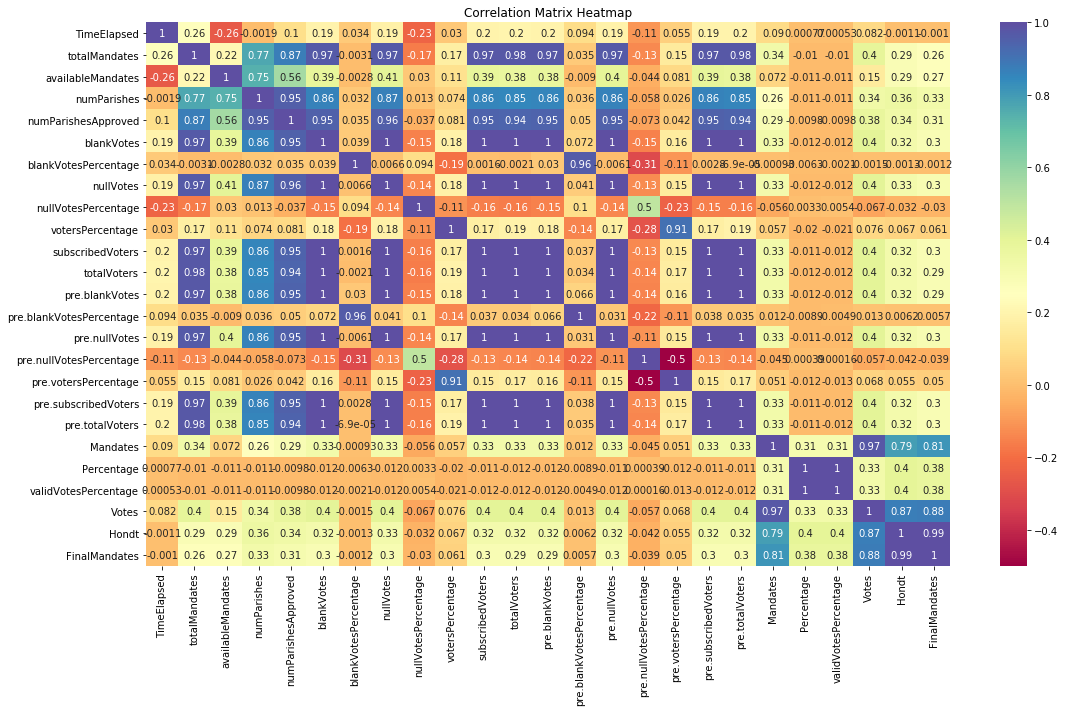

In [16]:
plt.figure(figsize=(18,10))
sns.heatmap(cor,cmap='Spectral',annot=True)
plt.title("Correlation Matrix Heatmap")

Final Mandates is very strongly correlated with Votes and Mandates won by a party.

In [55]:
#Checking for null values
df.isnull().sum()

TimeElapsed                 0
territoryName               0
totalMandates               0
availableMandates           0
numParishes                 0
numParishesApproved         0
blankVotes                  0
blankVotesPercentage        0
nullVotes                   0
nullVotesPercentage         0
votersPercentage            0
subscribedVoters            0
totalVoters                 0
pre.blankVotes              0
pre.blankVotesPercentage    0
pre.nullVotes               0
pre.nullVotesPercentage     0
pre.votersPercentage        0
pre.subscribedVoters        0
pre.totalVoters             0
Party                       0
Mandates                    0
Percentage                  0
validVotesPercentage        0
Votes                       0
Hondt                       0
FinalMandates               0
dtype: int64

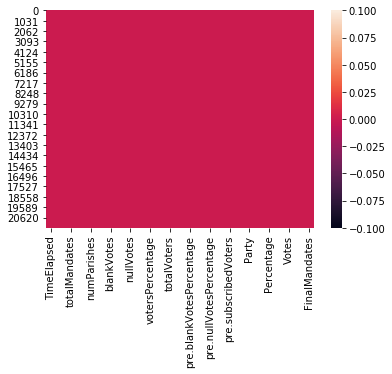

In [56]:
sns.heatmap(df.isnull())

In [57]:
df.skew()

TimeElapsed                 -0.005496
totalMandates                5.150031
availableMandates            5.131572
numParishes                  3.920433
numParishesApproved          4.238343
blankVotes                   4.521940
blankVotesPercentage         0.069627
nullVotes                    4.520945
nullVotesPercentage          0.855419
votersPercentage            -1.158029
subscribedVoters             4.568797
totalVoters                  4.541364
pre.blankVotes               4.551489
pre.blankVotesPercentage     0.021609
pre.nullVotes                4.563235
pre.nullVotesPercentage      1.231109
pre.votersPercentage        -0.779289
pre.subscribedVoters         4.565085
pre.totalVoters              4.548030
Mandates                    16.576658
Percentage                   2.542328
validVotesPercentage         2.543122
Votes                       13.940573
Hondt                       11.489315
FinalMandates               12.402865
dtype: float64

In [58]:
cat = pd.get_dummies(df)
cat

,TimeElapsed,totalMandates,availableMandates,numParishes,numParishesApproved,blankVotes,blankVotesPercentage,nullVotes,nullVotesPercentage,votersPercentage,...,Party_PCP-PEV,Party_PCTP/MRPP,Party_PDR,Party_PNR,Party_PPD/PSD,Party_PPM,Party_PS,Party_PTP,Party_PURP,Party_R.I.R.
0,0,0,226,3092,1081,9652,2.50,8874,2.30,51.36,...,0,0,0,0,0,0,1,0,0,0
1,0,0,226,3092,1081,9652,2.50,8874,2.30,51.36,...,0,0,0,0,1,0,0,0,0,0
2,0,0,226,3092,1081,9652,2.50,8874,2.30,51.36,...,0,0,0,0,0,0,0,0,0,0
3,0,0,226,3092,1081,9652,2.50,8874,2.30,51.36,...,0,0,0,0,0,0,0,0,0,0
4,0,0,226,3092,1081,9652,2.50,8874,2.30,51.36,...,1,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
21638,265,8,0,277,277,4995,2.81,3700,2.08,51.04,...,0,0,0,0,0,0,0,0,0,0
21639,265,8,0,277,277,4995,2.81,3700,2.08,51.04,...,0,0,0,1,0,0,0,0,0,0
21640,265,8,0,277,277,4995,2.81,3700,2.08,51.04,...,0,0,0,0,0,0,0,0,0,0
21641,265,8,0,277,277,4995,2.81,3700,2.08,51.04,...,0,0,0,0,0,0,0,1,0,0


In [59]:
cat.columns

Index(['TimeElapsed', 'totalMandates', 'availableMandates', 'numParishes',
       'numParishesApproved', 'blankVotes', 'blankVotesPercentage',
       'nullVotes', 'nullVotesPercentage', 'votersPercentage',
       'subscribedVoters', 'totalVoters', 'pre.blankVotes',
       'pre.blankVotesPercentage', 'pre.nullVotes', 'pre.nullVotesPercentage',
       'pre.votersPercentage', 'pre.subscribedVoters', 'pre.totalVoters',
       'Mandates', 'Percentage', 'validVotesPercentage', 'Votes', 'Hondt',
       'FinalMandates', 'territoryName_Aveiro', 'territoryName_Açores',
       'territoryName_Beja', 'territoryName_Braga', 'territoryName_Bragança',
       'territoryName_Castelo Branco', 'territoryName_Coimbra',
       'territoryName_Faro', 'territoryName_Guarda', 'territoryName_Leiria',
       'territoryName_Lisboa', 'territoryName_Madeira',
       'territoryName_Portalegre', 'territoryName_Porto',
       'territoryName_Santarém', 'territoryName_Setúbal',
       'territoryName_Território Nacional',

In [60]:
cat.drop(["territoryName_Açores","Party_MAS"],axis=1,inplace=True)
cat.shape

(21643, 65)

In [61]:
X=cat.drop("FinalMandates", axis=1)
y=cat["FinalMandates"]

In [62]:
from sklearn.preprocessing import StandardScaler
X2 = StandardScaler().fit_transform(X)
X2

array([[-1.71470808, -0.36868023,  6.75847178, ..., -0.22228013,
        -0.21684649, -0.22308016],
       [-1.71470808, -0.36868023,  6.75847178, ..., -0.22228013,
        -0.21684649, -0.22308016],
       [-1.71470808, -0.36868023,  6.75847178, ..., -0.22228013,
        -0.21684649, -0.22308016],
       ...,
       [ 1.69806785, -0.11320217, -0.36231853, ..., -0.22228013,
        -0.21684649, -0.22308016],
       [ 1.69806785, -0.11320217, -0.36231853, ...,  4.49882767,
        -0.21684649, -0.22308016],
       [ 1.69806785, -0.11320217, -0.36231853, ..., -0.22228013,
        -0.21684649, -0.22308016]])

Finding best random_state for Linear Regression Model

In [63]:
from sklearn.metrics import r2_score, mean_squared_error,mean_absolute_error,roc_curve,auc
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
max_r2_score=0
for r_state in range(0,200):
    X_train,X_test,y_train,y_test = train_test_split(X2,y, test_size=0.25,random_state=r_state)
    lr = LinearRegression()
    lr.fit(X_train,y_train)
    y_pred = lr.predict(X_test)
    r2_scr = r2_score(y_test,y_pred)
    if r2_scr>max_r2_score:
        max_r2_score = r2_scr
        final_r_state = r_state
    
print("max R2 score corresponding to random state",final_r_state,"is",max_r2_score)

max R2 score corresponding to random state 168 is 0.9949720409808411


In [64]:
X_train,X_test,y_train,y_test = train_test_split(X2,y, test_size=0.25,random_state=168)

In [65]:
print(X_train.shape,"\n",X_test.shape)

(16232, 64) 
 (5411, 64)


Observing performance of different algorithms

In [29]:
from sklearn.linear_model import Ridge,Lasso
from sklearn.neighbors import KNeighborsRegressor
from sklearn.svm import SVR
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import AdaBoostRegressor
from sklearn.ensemble import GradientBoostingRegressor
import xgboost as xgb

In [30]:
LR = LinearRegression()
RR = Ridge()
LSR = Lasso()
KNR = KNeighborsRegressor()#(n_neighbors=2)
SV = SVR()
DTC = DecisionTreeRegressor()
RFC = RandomForestRegressor()
ABC = AdaBoostRegressor()#(n_estimators=100,base_estimator=SV,algorithm='SAMME')
GBC = GradientBoostingRegressor()
XGB = xgb.XGBRegressor()# From the GridSearchCV parameter tuning

In [31]:
models = []
models.append(("LinearRegression", LR))
models.append(("Ridge", RR))
models.append(("Lasso", LSR))
models.append(("KNeighborsRegressor", KNR))
models.append(("SVR", SV))
models.append(("DecisionTreeRegressor", DTC))
models.append(("RandomForestRegressor", RFC))
models.append(("AdaBoostRegressor", ABC))
models.append(("GradientBoostingRegressor", GBC))
models.append(("XGBoostRegressor", XGB))

In [33]:
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import KFold
kf = KFold(n_splits=4, random_state=168, shuffle=True)

In [34]:
Model = []
score = []
cvs = []
MSE = []
MAE = []
for name,model in models:
    print("*****************",name,"******************\n")
    Model.append(name)
    model.fit(X_train,y_train)
    print(model)
    pre = model.predict(X_test)
    print("\n")
    R2 = r2_score(y_test,pre)
    print("R2 Score = ",R2)
    score.append(R2)
    print("\n")
    sc = cross_val_score(model,X,y,cv=kf,scoring="r2").mean()
    print("Cross val score = ",sc)
    cvs.append(sc)
    print("\n")
    mse = mean_squared_error(y_test,pre)
    print("Mean Squared error\n", mse)
    MSE.append(mse)
    print("\n")
    mae = mean_absolute_error(y_test,pre)
    print("Mean absolute error \n{}".format(mae))
    MAE.append(mae)
    print("\n\n")

***************** LinearRegression ******************

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)


R2 Score =  0.9949720409808411


Cross val score =  0.9930466797800367


Mean Squared error
 0.21444340273196746


Mean absolute error 
0.18635844773528842



***************** Ridge ******************

Ridge(alpha=1.0, copy_X=True, fit_intercept=True, max_iter=None,
      normalize=False, random_state=None, solver='auto', tol=0.001)


R2 Score =  0.9949746654572704


Cross val score =  0.9930475466424674


Mean Squared error
 0.21433146831608824


Mean absolute error 
0.1860160989270182



***************** Lasso ******************

Lasso(alpha=1.0, copy_X=True, fit_intercept=True, max_iter=1000,
      normalize=False, positive=False, precompute=False, random_state=None,
      selection='cyclic', tol=0.0001, warm_start=False)


R2 Score =  0.9654016406435233


Cross val score =  0.9884942500166801


Mean Squared error
 1.4756265675744349


Mean absol

In [35]:
result = pd.DataFrame({"Model": Model, "R2 Socre": score, "Cross val score": cvs, "Mean Squared Error": MSE, "Mean Absolute Error": MAE})
resultfrom sklearn.model_selection import GridSearchCV
parameters = {
              'n_estimators': [440,439,441]
             }
grid = GridSearchCV(estimator=XGB,param_grid=parameters)
grid.fit(X_train,y_train)
print(grid)
print(grid.best_score_)
print(grid.best_estimator_.n_estimators)
print(grid.best_params_)

,Model,R2 Socre,Cross val score,Mean Squared Error,Mean Absolute Error
0,LinearRegression,0.994972,0.993047,0.214443,0.186358
1,Ridge,0.994975,0.993048,0.214331,0.186016
2,Lasso,0.965402,0.988494,1.475627,0.215892
3,KNeighborsRegressor,0.999989,0.931827,0.000473,0.000591
4,SVR,0.520026,0.276116,20.470981,0.356623
5,DecisionTreeRegressor,0.999961,0.999936,0.001663,0.001294
6,RandomForestRegressor,0.999968,0.999953,0.001356,0.002109
7,AdaBoostRegressor,0.996397,0.996072,0.153679,0.281507
8,GradientBoostingRegressor,0.999597,0.999466,0.017187,0.041083
9,XGBoostRegressor,0.999988,0.999957,0.000509,0.003482


Clearly XGBoost provides the best generalization performance, let's find the best parameters for it

In [37]:
from sklearn.model_selection import GridSearchCV
parameters = {
              'n_estimators': [120,200]
             }
grid = GridSearchCV(estimator=XGB,param_grid=parameters)
grid.fit(X_train,y_train)
print(grid)
print(grid.best_score_)
print(grid.best_estimator_.n_estimators)
print(grid.best_params_)

GridSearchCV(cv=None, error_score=nan,
             estimator=XGBRegressor(base_score=0.5, booster='gbtree',
                                    colsample_bylevel=1, colsample_bynode=1,
                                    colsample_bytree=1, gamma=0, gpu_id=-1,
                                    importance_type='gain',
                                    interaction_constraints='',
                                    learning_rate=0.300000012, max_delta_step=0,
                                    max_depth=6, min_child_weight=1,
                                    missing=nan, monotone_constraints='()',
                                    n_estimators=100, n_jobs=0,
                                    num_parallel_tree=1,
                                    objective='reg:squarederror',
                                    random_state=0, reg_alpha=0, reg_lambda=1,
                                    scale_pos_weight=1, subsample=1,
                                    tree_method='exac

In [38]:
XGB = xgb.XGBRegressor(n_estimators=200)
XGB.fit(X_train,y_train)

XGBRegressor(base_score=0.5, booster='gbtree', colsample_bylevel=1,
             colsample_bynode=1, colsample_bytree=1, gamma=0, gpu_id=-1,
             importance_type='gain', interaction_constraints='',
             learning_rate=0.300000012, max_delta_step=0, max_depth=6,
             min_child_weight=1, missing=nan, monotone_constraints='()',
             n_estimators=200, n_jobs=0, num_parallel_tree=1,
             objective='reg:squarederror', random_state=0, reg_alpha=0,
             reg_lambda=1, scale_pos_weight=1, subsample=1, tree_method='exact',
             validate_parameters=1, verbosity=None)

Saving the model

In [39]:
from sklearn.externals import joblib
joblib.dump(XGB,'Election_Prediction.pkl')

['Election_Prediction.pkl']